In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [102]:
calories = pd.read_csv('./source_files/calories.csv')
print(calories.head())
print(calories.shape)
calories.columns

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0
(15000, 2)


Index(['User_ID', 'Calories'], dtype='object')

In [103]:
exercise = pd.read_csv('./source_files/exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [104]:
dataframe = exercise.merge(calories[['User_ID', 'Calories']],on='User_ID',how='left')

In [105]:
dataframe

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [106]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [113]:
dataframe.replace({'male':0,'female':1},inplace=True)

In [114]:
dataframe


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [115]:
numerical_columns = [col for col in dataframe.columns if dataframe[col].dtype !="O"]

In [116]:
numerical_columns

['User_ID',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'Calories']

In [117]:
numerical_frame = dataframe.drop('Gender',axis=1)

In [118]:
numerical_frame.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0


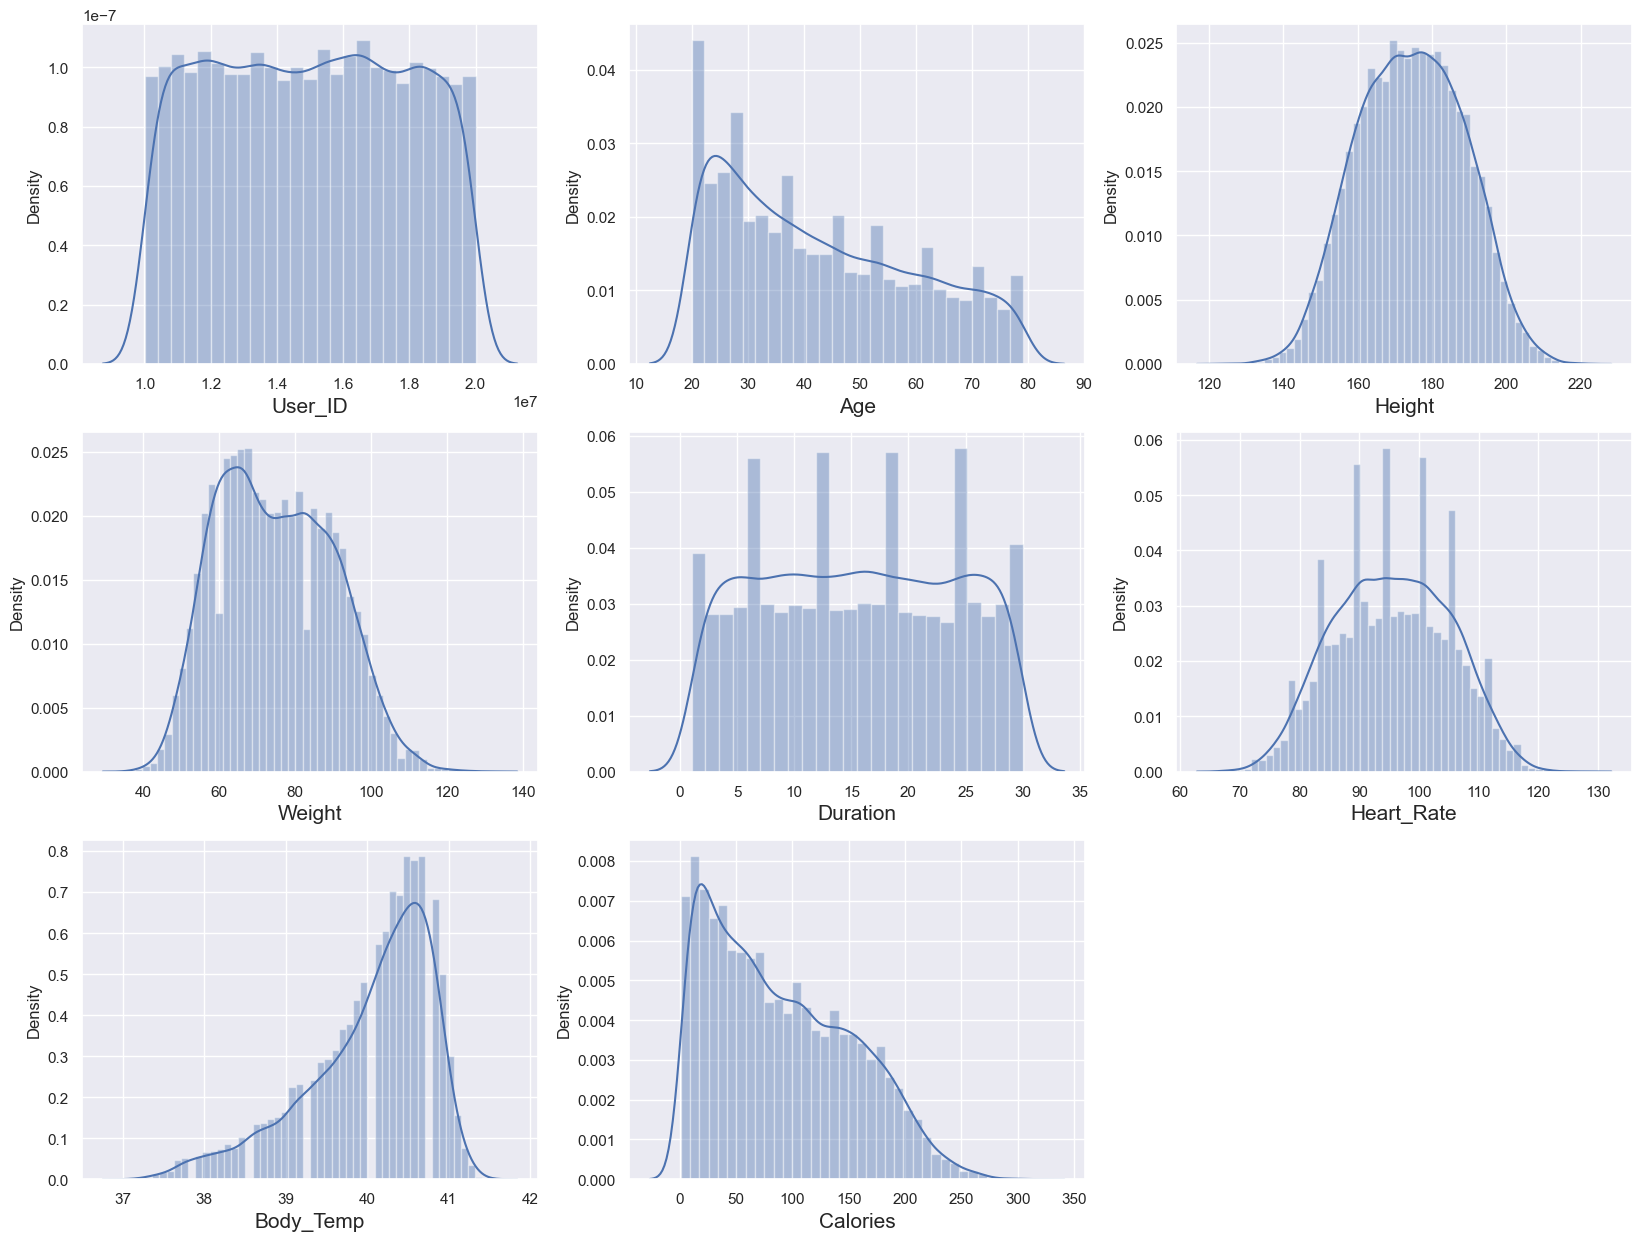

In [119]:

import seaborn as sns

plt.figure(figsize=(20,15))
plotnumber = 1

for column in numerical_frame:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(numerical_frame[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

In [120]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()


In [121]:
dataframe['Gender'].dtype


dtype('int64')

In [122]:
dataframe['Gender'].value_counts()

Gender
1    7553
0    7447
Name: count, dtype: int64

In [123]:
cat_col=[col for col in dataframe.columns if dataframe[col].dtype=='O'] 
cat_col

[]

In [124]:
categorical = dataframe[cat_col]
categorical

""
0
1
2
3
4
...
14995
14996
14997
14998


In [126]:
#categorical = pd.get_dummies(categorical["Gender"],drop_first=True)


In [61]:
categorical

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


In [62]:
categorical.replace({'True':1,'False':0},inplace=True)
categorical

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


In [57]:
#pd.get_dummies(dataframe["male"],drop_first=True)

In [127]:
#sns.countplot(categorical['male'])
#plt.show()

<Axes: >

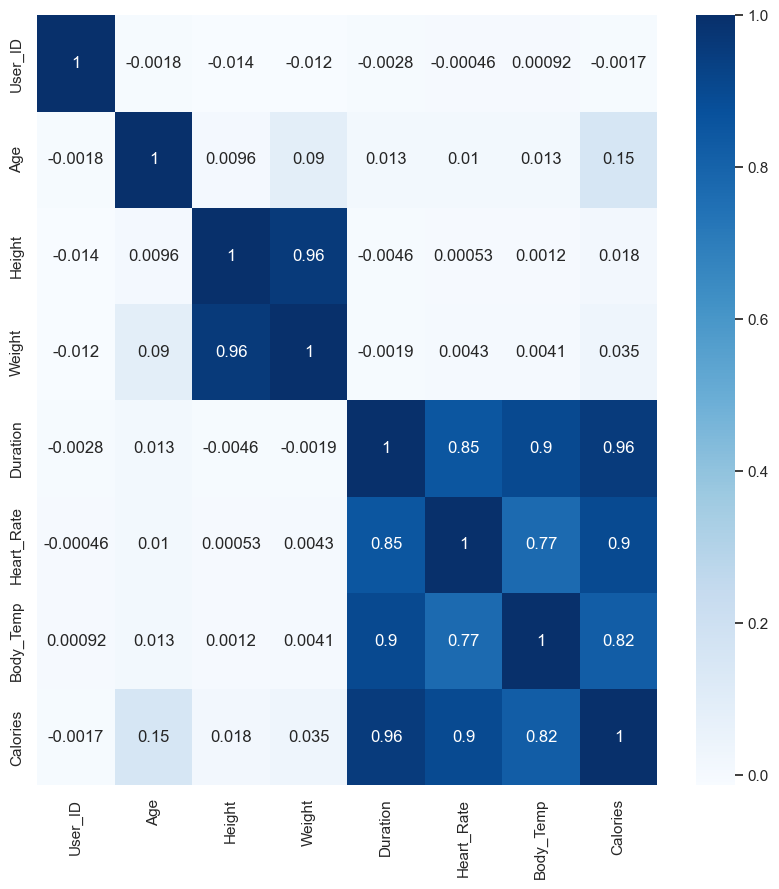

In [128]:
plt.figure(figsize=(10,10))
sns.heatmap(numerical_frame.corr(), cmap='Blues',annot = True)

In [129]:
dataframe = pd.concat([categorical,numerical_frame],axis=1)

In [130]:
dataframe.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0


In [132]:
X = dataframe.drop(columns=["User_ID","Calories"],axis=1)
Y = dataframe['Calories']

In [133]:
X

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,68,190.0,94.0,29.0,105.0,40.8
1,20,166.0,60.0,14.0,94.0,40.3
2,69,179.0,79.0,5.0,88.0,38.7
3,34,179.0,71.0,13.0,100.0,40.5
4,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...
14995,20,193.0,86.0,11.0,92.0,40.4
14996,27,165.0,65.0,6.0,85.0,39.2
14997,43,159.0,58.0,16.0,90.0,40.1
14998,78,193.0,97.0,2.0,84.0,38.3


In [67]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [68]:

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=41,shuffle=False)

In [69]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (12000, 7)
Shape of X Test:  (3000, 7)
Shape of y Train:  (12000,)
Shape of y Test:  (3000,)


In [70]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print(f"Score : {model.score(X_train,y_train)}")
    y_prediction=model.predict(X_test)
    print(f"predictions are:{(y_prediction)}")
    print('\n')

    r2_score=metrics.r2_score(y_test,y_prediction)
    print(f"r2 score:{(r2_score)}")

    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)

USING XGBREGRESSOR

Score : 0.9995319758099539
predictions are:[52.61459  17.789526 13.742875 ... 76.136406 10.672598 94.896385]


r2 score:0.9988351020756031
MAE: 1.4855876934925716
MSE: 4.600599774461668
RMSE: 2.1449008775376237


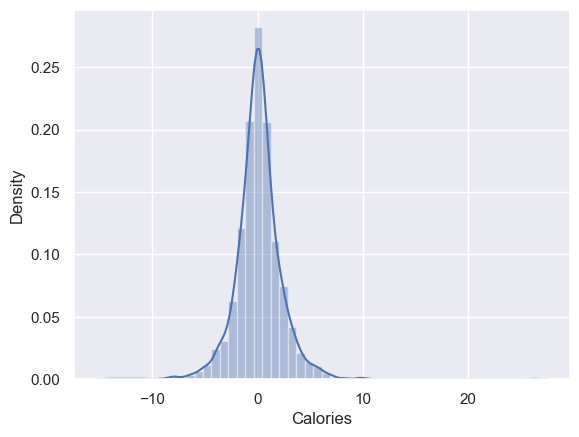

In [71]:
regression = predict(XGBRegressor())
regression

DECISION TREE REGRESSION

Score : 1.0
predictions are:[51. 18. 14. ... 74. 10. 97.]


r2 score:0.9927199995292872
MAE: 3.421333333333333
MSE: 28.751333333333335
RMSE: 5.362026979914717


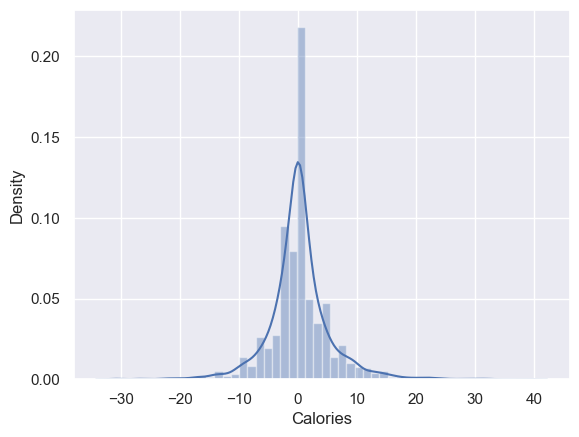

In [72]:
predict(DecisionTreeRegressor())

Score : 0.999687398332152
predictions are:[51.68 18.52 14.32 ... 75.67  9.87 97.81]


r2 score:0.9979942889305315
MAE: 1.7455700000000003
MSE: 7.921272500000001
RMSE: 2.8144755284066694


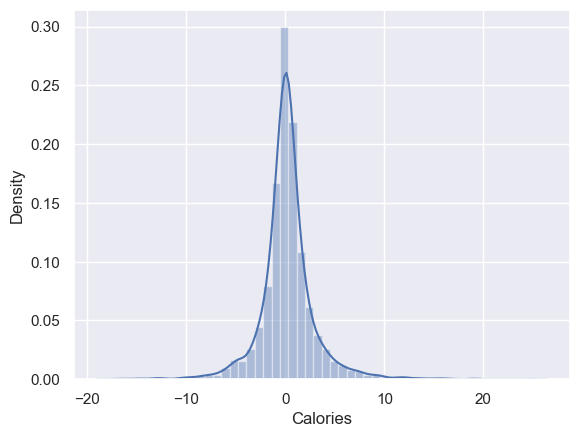

In [73]:
predict(RandomForestRegressor())

Score : 0.9674811822968746
predictions are:[ 50.50107446   4.67987555   6.68206918 ...  78.92894055  26.48836573
 101.70123699]


r2 score:0.9660690794364076
MAE: 8.495778598550842
MSE: 134.00537697151972
RMSE: 11.576069150256478


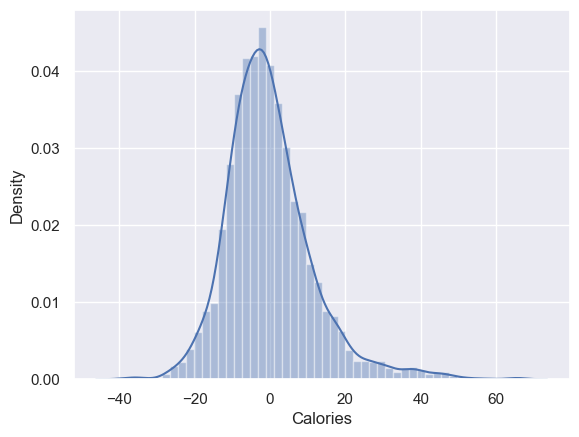

In [74]:
predict(LinearRegression())

In [81]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
label_encoder = LabelEncoder()
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [76]:
model = XGBRegressor()
model_applied = model.fit(X_train,y_train)
print(f"model's score{model_applied.score(X_train,y_train)}")
y_prediction = model_applied.predict(X_test)

r2_score = metrics.r2_score(y_test,y_prediction)
print(f"r2_score {r2_score}")
print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))


model's score0.9995319758099539
r2_score 0.9988351020756031
MAE: 1.4855876934925716
MSE: 4.600599774461668
RMSE: 2.1449008775376237


In [77]:
pickle.dump(model_applied,open('model.pkl','wb'))

In [78]:
pickled_model = pickle.load(open('model.pkl','rb'))
pickled_model.predict(X_test)

array([52.61459 , 17.789526, 13.742875, ..., 76.136406, 10.672598,
       94.896385], dtype=float32)

In [79]:
model_applied

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [100]:
new_feature = [False,20,193.0,85.0,11.0,92.0,40.4]
categorical_feature = label_encoder.fit_transform([new_feature[0]])
numerical_features = np.array(new_feature[1:], dtype=float)
processed_data = np.concatenate([categorical_feature, numerical_features])
print(processed_data)

#scaled_data = scaler.transform([processed_data])
#input_data =processed_data.reshape(1,-1)


predicted = model_applied.predict(processed_data)
print(predicted)

[  0.   20.  193.   85.   11.   92.   40.4]


XGBoostError: [08:16:06] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\predictor\cpu_predictor.cc:719: Check failed: m->NumColumns() == model.learner_model_param->num_feature (1 vs. 7) : Number of columns in data must equal to trained model.

In [97]:
model_applied.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
model_applied.